In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

In [13]:
def plot_raw_data(x, y, ax):
    ax.plot(x, y, 'ko', label='raw data')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.grid(True)

Produce a function, calculate_newton_poly_coeffs, which calculates the coefficients of the Newton Polynomial for the given dataset 

In [14]:
def calculate_newton_poly_coeffs(xi, yi):
    #create a copy of yi to calculate the coefficients without modifying the original data
    a = yi.copy()
    N = len(a) - 1
    for k in range(1, N+1):
        for i in range(k, N+1):
            a[i] = (a[i] - a[k-1])/(xi[i]-xi[k-1])
    return a

This returns an array a which increments the range to produce two indexes k and i so that the first iteration has a valid k-1 component.

It then prints the coefficients a0, a1, a2 etc. in the newton polynomial formula to an array. But we need a 2nd function to evaluate these coefficients into a figure for the Newton polynomial at a given value of x. 

In [15]:
def eval_newton_poly(a, xi, x):
    N = len(xi) - 1 #polynomial degree 
    P = a[N] #create a function P which is overwritten as the polynomial is built up and evaluated at x
    for k in range(1, N+1):
        P = a[N-k] + (x - xi[N-k])*P #multiply P by the x and a variables in the formula for the Newton polynomial.
    return P

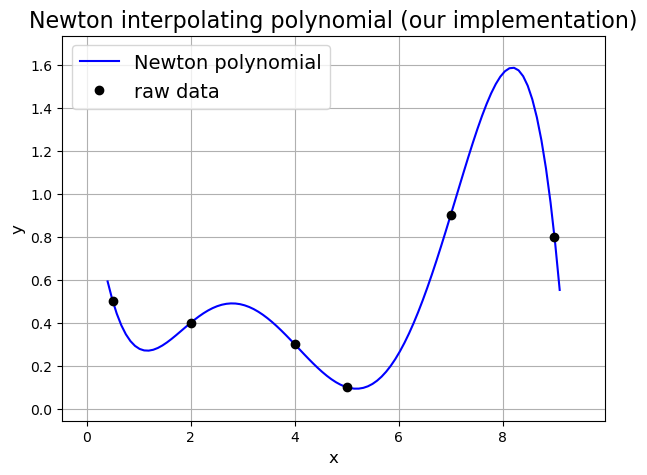

In [16]:
# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)

# add a small margin 
ax1.margins(0.1)

# Evaluate the coefficients of the Newton polynomial
a = calculate_newton_poly_coeffs(xi, yi)
# Evaluate the polynomial at high resolution and plot
x = np.linspace(0.4, 9.1, 100)
ax1.plot(x, eval_newton_poly(a, xi, x), 'b', label='Newton polynomial')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Newton interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14)

plt.show()
